In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: Monday, October 31st, 2022 at 11:59pm**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. (Challenging) [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. (Challenging) [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. (Challenging) [Your takeaway from the course](#15)

## Instructions
<hr>
rubric={points:6}

Follow the [homework submission instructions](https://ubc-cs.github.io/cpsc330-2023W1/docs/homework_instructions.html). 

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 4. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline.
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).


**When you are ready to submit your assignment do the following:**

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission.
4. Make sure that the plots and output are rendered properly in your submitted file. 
5. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb.

## Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

<!-- BEGIN QUESTION -->



In [3]:
...

Ellipsis

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and we hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this assignment we'll be exploring a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset. In this assignment we'll try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on. You can find an explaination of the features [here](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit).  Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe.

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

Looks like a basic dataset. We can apply some stuff we learned in classes on this. Could maybe try a Bag-Of-Words on the name, maybe. Also noticing some missing values which we could use basic encoding on.

In [4]:
nyc2019raw = pd.read_csv('data/AB_NYC_2019.csv')
nyc2019raw

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [5]:
from sklearn.model_selection import train_test_split

X = nyc2019raw.drop(columns=["reviews_per_month"])
y = nyc2019raw["reviews_per_month"]

y = y.fillna(0)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123
)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

There are definitely some columns that will not be useful. id, host_id, maybe lat/longitude.

I also notice a few outliers in the data, I may remove them.

In [6]:
X_train.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,3.422600e+04,3.422600e+04,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000
mean,1.893979e+07,6.726273e+07,40.729142,-73.952083,151.528399,7.094957,23.244814,7.042453,112.526004
std,1.101332e+07,7.840511e+07,0.054531,0.046201,236.628392,21.548290,44.573323,32.590803,131.420031
min,2.539000e+03,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.394482e+06,7.721897e+06,40.690193,-73.983030,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.954546e+07,3.074526e+07,40.723240,-73.955550,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915085e+07,1.068375e+08,40.763287,-73.936270,175.000000,5.000000,23.000000,2.000000,225.750000
max,3.648561e+07,2.743213e+08,40.912340,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [7]:
X_train["price"].mean()

151.528399462397

In [8]:
X_train["price"].std()

236.6283917654483

In [9]:
X_train["number_of_reviews"].mean()

23.244813884181617

In [10]:
X_train["number_of_reviews"].std()

44.57332292160429

<Axes: >

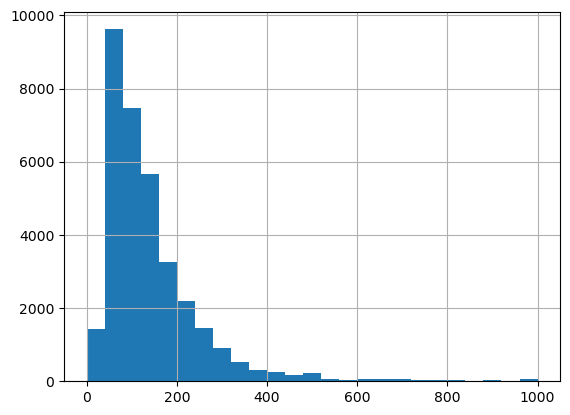

In [11]:
X_train["price"].loc[X_train['price'] <= 1000].hist(bins=25)
# Filtering the prices to only be below 1000, seems like the data has an exp distribution. Lots of outliers later on makes plot looks weird.

<Axes: >

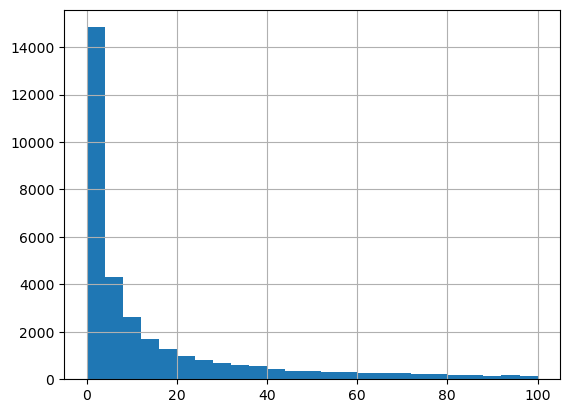

In [12]:
X_train["number_of_reviews"].loc[X_train['number_of_reviews'] <= 100].hist(bins=25)
# Seems very exponential here. Again, filtering data to only the reviews less than 100 or else outliers ruin the plot.

In [13]:
...

Ellipsis

In [14]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## (Challenging) 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify any data cleaning that needs to be done and perform it.
2. Identify different feature types and the transformations you would apply on each feature type. 
3. Define a column transformer, if necessary.
4. You have likely noticed the `number_of_reviews` feature will be higly informative for the target `reviews_per_month`. To make this assignment more interesting **drop** the `number_of_reviews` feature.

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

Realizing now that we have to remove quite a bit of the columns. Not much can be done.

Also, while I would've liked to use neighbourhood instead of neighbourhood_group, I got into a lot of issues while using it. Had to resort using neighbourhood instead

In [15]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import (
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
)
from sklearn.compose import ColumnTransformer, make_column_transformer

In [16]:
# lecture 6

numeric_feats = ["price", "minimum_nights", "calculated_host_listings_count", "availability_365"]  # apply scaling
categorical_feats = ["neighbourhood_group", "room_type"]  # apply one-hot encoding
drop_feats = [
    "id",
    "name",
    "host_id",
    "host_name",
    "neighbourhood",
    "latitude",
    "longitude",
    "last_review",
    "number_of_reviews"
]  # do not include these features in modeling

In [17]:
ct = make_column_transformer(    
    (make_pipeline(SimpleImputer(), StandardScaler()), numeric_feats),  # scaling on numeric features
    (OneHotEncoder(), categorical_feats),  # OHE on categorical features
    ("drop", drop_feats),  # drop the drop features
)

In [18]:
X_transformed = ct.fit_transform(X)

In [19]:
column_names = (
    numeric_feats
    + ct.named_transformers_["onehotencoder"].get_feature_names_out().tolist()
)

X_transformed = pd.DataFrame(X_transformed, columns=column_names)



In [20]:
y

0        0.21
1        0.38
2        0.00
3        4.64
4        0.10
         ... 
48890    0.00
48891    0.00
48892    0.00
48893    0.00
48894    0.00
Name: reviews_per_month, Length: 48895, dtype: float64

In [21]:
pd.DataFrame(X_transformed, columns=column_names).describe()

,price,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
count,4.889500e+04,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,3.720195e-17,1.104433e-17,-1.860098e-17,0.000000,0.022313,0.411167,0.443011,0.115881,0.007629,0.519665,0.456611,0.023724
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010,0.147701,0.492050,0.496747,0.320085,0.087009,0.499618,0.498119,0.152190
min,-6.359342e-01,-2.939962e-01,-1.864514e-01,-0.856865,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-3.486158e-01,-2.939962e-01,-1.864514e-01,-0.856865,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.945465e-01,-1.964844e-01,-1.864514e-01,-0.514974,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,9.277183e-02,-9.897262e-02,-1.561044e-01,0.867785,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,4.100441e+01,6.060212e+01,9.706672e+00,1.916250,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='price', ylabel='reviews_per_month'>

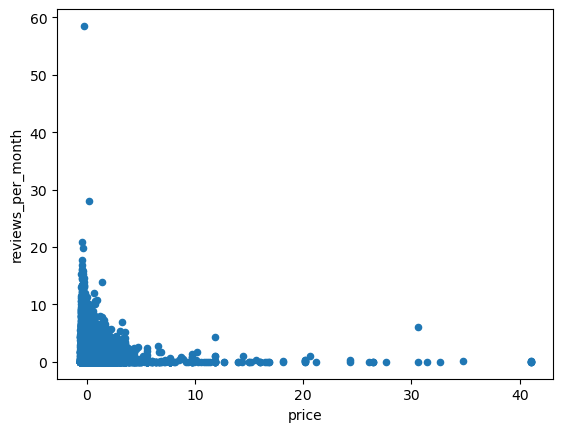

In [22]:
pd.DataFrame(X_transformed, columns=column_names).join(y).plot.scatter("price", "reviews_per_month")
# ok yeah there really isn't any sort of linear anything happening here maybe that's why my results are trash lower down

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [23]:
from sklearn.dummy import DummyRegressor

In [24]:
# lecture 2 & 6

dummypipe = make_pipeline(ct, DummyRegressor(strategy="median"))
dummypipe.fit(X, y)
dummypipe.score(X, y)

-0.20370761299136664

In [25]:
# this sucks

<!-- END QUESTION -->



<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

Why is this so bad

In [26]:
# lec 7

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, cross_validate

ridgepipe = make_pipeline(ct, Ridge())
ridgescores = cross_validate(ridgepipe, X_train, y_train, return_train_score=True)
pd.DataFrame(ridgescores)


,fit_time,score_time,test_score,train_score
0,0.024697,0.006001,0.072675,0.062825
1,0.025029,0.004519,0.063058,0.065394
2,0.024259,0.005011,0.057182,0.067096
3,0.022225,0.006009,0.067404,0.064281
4,0.022102,0.005013,0.057627,0.066318


In [27]:
X_transformed

,price,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,-0.015493,-0.293996,-0.034716,1.916250,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.300974,-0.293996,-0.156104,1.840275,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,-0.011329,-0.196484,-0.186451,1.916250,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.265335,-0.293996,-0.186451,0.617065,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.302811,0.144807,-0.186451,-0.856865,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,-0.344452,-0.245240,-0.156104,-0.788486,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
48891,-0.469373,-0.147729,-0.156104,-0.583352,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
48892,-0.157070,0.144807,-0.186451,-0.651730,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
48893,-0.406912,-0.293996,-0.034716,-0.841669,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [28]:
# lec 7

scores_dict = {
    "alpha": 10.0 ** np.arange(-3, 6, 1),
    "mean_train_scores": list(),
    "mean_cv_scores": list(),
}
for alpha in scores_dict["alpha"]:
    pipe_ridge = make_pipeline(ct, Ridge(alpha=alpha))
    scores = cross_validate(pipe_ridge, X_train, y_train, return_train_score=True)
    scores_dict["mean_train_scores"].append(scores["train_score"].mean())
    scores_dict["mean_cv_scores"].append(scores["test_score"].mean())

results_df = pd.DataFrame(scores_dict)

In [29]:
results_df

,alpha,mean_train_scores,mean_cv_scores
0,0.001,0.065183,0.063589
1,0.010,0.065183,0.063589
2,0.100,0.065183,0.063589
3,1.000,0.065183,0.063589
4,10.000,0.065182,0.063594
5,100.000,0.065170,0.063622
6,1000.000,0.064641,0.063302
7,10000.000,0.055917,0.055285
8,100000.000,0.020044,0.020004


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

I have defined a new response variable, where it is a binary variable on whether an airbnb has less or more than 1 review per month. That way, I no longer have to assume normality for models as well as letting me use models that predicts binary variables over a numeric one, considering a Ridge model worked exceptionally poorly.

The models built now all have easily beaten a linear model, with the train and test scores in the 0.7-0.8, compared to the 0-0.1 range.

From the three models we've chosen, it appears that KNN works the best. Random Forest looks like it's extremely overfitting, so I'd be extra carefuly using it. Both KNN and Logistic Regression seems to work a bit better, but KNN has better train and test scores, which suggests that the Logistic Regression model might be slightly underfitting

In [30]:
# model: Random Forest
# lec 11
from sklearn.ensemble import RandomForestClassifier

y_train_categorical = pd.cut(y_train, bins=[-1, 1, float('inf')], labels = ['less than 1', '1 or more'], right=False)

treepipe = make_pipeline(ct, RandomForestClassifier(random_state=123))
scores = cross_validate(treepipe, X_train, y_train_categorical, return_train_score=True)
print("Mean validation score %0.3f" % (np.mean(scores["test_score"])))
print("Mean training score %0.3f" % (np.mean(scores["train_score"])))
pd.DataFrame(scores)

Mean validation score 0.771
Mean training score 0.975


,fit_time,score_time,test_score,train_score
0,4.294848,0.196126,0.772130,0.974690
1,4.561518,0.197421,0.765084,0.976115
2,4.613745,0.189610,0.772535,0.975129
3,4.611183,0.163199,0.771074,0.974435
4,4.551954,0.155500,0.775310,0.975202


In [31]:
# model: KNN (I tried using SVC but the kernel would run very very slowly for some reason)
# lec 4
from sklearn.neighbors import KNeighborsClassifier

knnpipe = make_pipeline(ct, KNeighborsClassifier())
scores = cross_validate(knnpipe, X_train, y_train_categorical, return_train_score=True)
print("Mean validation score %0.3f" % (np.mean(scores["test_score"])))
pd.DataFrame(scores)

Mean validation score 0.769


,fit_time,score_time,test_score,train_score
0,0.117199,0.370631,0.761467,0.830022
1,0.109593,0.377327,0.769905,0.830905
2,0.106987,0.378439,0.771658,0.832512
3,0.088753,0.414828,0.773411,0.831635
4,0.100663,0.380060,0.768444,0.832913


In [32]:
# model: Logistic Regression
# lec 7
from sklearn.linear_model import LogisticRegression

lrpipe = make_pipeline(ct, LogisticRegression())
scores = cross_validate(lrpipe, X_train, y_train_categorical, return_train_score=True)
print("Mean validation score %0.3f" % (np.mean(scores["test_score"])))
pd.DataFrame(scores)


Mean validation score 0.699


,fit_time,score_time,test_score,train_score
0,0.104252,0.019048,0.701139,0.697809
1,0.143384,0.016502,0.695252,0.701545
2,0.119547,0.017086,0.700804,0.698952
3,0.148927,0.018360,0.699050,0.699938
4,0.105007,0.013083,0.701096,0.700522


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## (Challenging) 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

In [33]:
...

Ellipsis

In [34]:
...

Ellipsis

In [35]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

For my Random Forest Model, the best hyperparameters are: 
- n_estimators: 6
- max_features: 3
- max_depth: 13
with a best score of 0.785

For my KNN model, the best n_neighbours hyperparameter is 11, with a best score of 0.776.

For my logistic regression model, the best C hyperparameter is 100, with a best score of 0.7.

In [36]:
# lec 10, 11
from sklearn.model_selection import RandomizedSearchCV 

# random forest:
forest_grid = {"randomforestclassifier__n_estimators": np.arange(1, 10, 1),
              "randomforestclassifier__max_depth": np.arange(1, 50, 1),
              "randomforestclassifier__max_features": np.arange(1, 10, 1)}

forest_scoring = {
    "r2": "r2",
    "sklearn MAPE": "neg_mean_absolute_percentage_error",
    "neg_root_mean_square_error": "neg_root_mean_squared_error",
    "neg_mean_squared_error": "neg_mean_squared_error",
}

forest_search_multi = RandomizedSearchCV(
    treepipe,
    forest_grid,
    return_train_score=True,
    n_jobs=-1,
)
forest_search_multi.fit(X_train, y_train_categorical);

print("Best hyperparameter values: ", forest_search_multi.best_params_)
print("Best score: %0.3f" % (forest_search_multi.best_score_))

Best hyperparameter values:  {'randomforestclassifier__n_estimators': 9, 'randomforestclassifier__max_features': 4, 'randomforestclassifier__max_depth': 15}
Best score: 0.784


In [37]:
# knn:
knn_grid = {"kneighborsclassifier__n_neighbors": np.arange(1, 50, 5)}

knn_scoring = {
    "r2": "r2",
    "sklearn MAPE": "neg_mean_absolute_percentage_error",
    "neg_root_mean_square_error": "neg_root_mean_squared_error",
    "neg_mean_squared_error": "neg_mean_squared_error",
}

knn_search_multi = RandomizedSearchCV(
    knnpipe,
    knn_grid,
    return_train_score=True,
    n_jobs=-1,
)
knn_search_multi.fit(X_train, y_train_categorical);

print("Best hyperparameter values: ", knn_search_multi.best_params_)
print("Best score: %0.3f" % (knn_search_multi.best_score_))

Best hyperparameter values:  {'kneighborsclassifier__n_neighbors': 11}
Best score: 0.776


In [38]:
# logistic regression:
lr_grid = {"logisticregression__C": 10.0 ** np.arange(-4, 6, 1)}

lr_scoring = {
    "r2": "r2",
    "sklearn MAPE": "neg_mean_absolute_percentage_error",
    "neg_root_mean_square_error": "neg_root_mean_squared_error",
    "neg_mean_squared_error": "neg_mean_squared_error",
}

lr_search_multi = RandomizedSearchCV(
    lrpipe,
    lr_grid,
    return_train_score=True,
    n_jobs=-1,
)
lr_search_multi.fit(X_train, y_train_categorical);

lr_search_multi.best_params_

print("Best hyperparameter values: ", lr_search_multi.best_params_)
print("Best score: %0.3f" % (lr_search_multi.best_score_))

Best hyperparameter values:  {'logisticregression__C': 100.0}
Best score: 0.700


In [39]:
...

Ellipsis

In [40]:
...

Ellipsis

In [41]:
...

Ellipsis

In [42]:
...

Ellipsis

In [43]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

Using the random forest model, it appears that the availability_365 column is the most important, with the price in 2nd and minimum_nights the 3rd most important. There also seems to be variables that are not important, like the neighbourhood group and the room type.

In [44]:
# lec 11, using random forest model

pipe_rf = make_pipeline(ct, RandomForestClassifier(random_state=123))
pipe_rf.fit(X_train, y_train_categorical);

In [45]:
data = {
    "Importance": pipe_rf.named_steps["randomforestclassifier"].feature_importances_,
}
rf_imp_df = pd.DataFrame(
    data=data,
    index=column_names,
).sort_values(by="Importance", ascending=False)

rf_imp_df

,Importance
availability_365,0.475874
price,0.269385
minimum_nights,0.147623
calculated_host_listings_count,0.073776
neighbourhood_group_Manhattan,0.006030
room_type_Entire home/apt,0.005910
neighbourhood_group_Queens,0.005156
neighbourhood_group_Brooklyn,0.004994
room_type_Private room,0.004851
room_type_Shared room,0.002355


In [46]:
...

Ellipsis

In [47]:
...

Ellipsis

In [48]:
...

Ellipsis

In [49]:
...

Ellipsis

In [50]:
...

Ellipsis

In [51]:
...

Ellipsis

In [52]:
...

Ellipsis

In [53]:
...

Ellipsis

In [54]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

This KNN model does agree with the validation scores from before. The validation scores I got were around 0.769, while I got a 0.771 here. I trust my results here, and that I don't think I had issues with optimization bias.

In [55]:
best_knnpipe = make_pipeline(ct, KNeighborsClassifier(n_neighbors = 11))

best_knnpipe.fit(X_train, y_train_categorical)

y_test_categorical = pd.cut(y_test, bins=[-1, 1, float('inf')], labels = ['less than 1', '1 or more'], right=False)

print("Test accuracy: %0.3f" % (best_knnpipe.score(X_test, y_test_categorical)))

Test accuracy: 0.771


In [56]:
...

Ellipsis

In [57]:
...

Ellipsis

In [58]:
...

Ellipsis

In [59]:
...

Ellipsis

In [60]:
...

Ellipsis

In [61]:
...

Ellipsis

In [62]:
...

Ellipsis

In [63]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

We realized early on that a linear model will not work on the dataset as given. So, I've adapted the analysis so that we've created a binary response variable, rather looking at it numerically we looked at whether a house will produce less or greater than 1 review per month. That way, we can utilize many other models that are easier to interpret, runs faster, and produces better results.

Utilizing 3 chosen models, we've achieved the following results:

| Model:              | Hyperparameters:                              | Training Score: | Validation Score: | Test Score: |
|---------------------|-----------------------------------------------|-----------------|-------------------|-------------|
| Ridge (Linear)      | Alpha: 1                                      | 0.063-0.067     | 0.057-0.073       | -           |
| Random Forest       | n_estimators: 6 max_features: 3 max_depth: 13 | 0.974-0.976     | 0.765-0.775       | -           |
| KNN                 | n_neighbors: 11                               | 0.830-0.833     | 0.761-0.773       | 0.771       |
| Logistic Regression | C: 100                                        | 0.698-0.702     | 0.695-0.701       | -           |    |

While Random Forest had the best training score, it is easily seen that it is overfitting on the data, as the validation score is low. Meanwhile, the ridge linear model has seen the worst results. The best one used is KNN, with its number of neighbours hyperparameter to be 11, which results in a test score of 0.771, which could be seen as improvable.

We're sure that changing the response variable to a binary variable was the right choice, as linear models producing regressions will not have worked. Adapting the variable to categorical meant we were able to utilize a lot more models, and as seen, can produce fairly accurate results. However, finding models that can maintain the original response variable can optimize the results a lot.

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## (Challenging) 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

<!-- END QUESTION -->

<br><br>

**Before submitting your assignment, please make sure you have followed all the instructions in the Submission instructions section at the top.**

This was a tricky one but you did it! Have a great weekend! 

![](img/eva-well-done.png)